### Фактори довголіття: дослідження демографічних показників та тривалості життя  

В цій роботі вам необхідно дослідити демографічні та медичні показники країн для виявлення факторів, що впливають на очікувану тривалість життя, та розробити модель для прогнозування очікуваної тривалості життя.  

**Опис датасету**  
Country: Назва країни.  
Year: Рік, за який надано дані.  
Status: Рівень розвитку країни — "Developed" (Розвинена) чи "Developing" (Така, що розвивається).  
Life Expectancy: Очікувана тривалість життя.  
Adult Mortality: Показник смертності серед дорослих (ймовірність виживання у віці від 15 до 60 років на 1000 населення).  
Infant Deaths: Кількість смертей серед немовлят на 1000 народжених.  
Alcohol: Середнє споживання алкоголю на одну людину (літрів на душу населення).    
Percentage Expenditure: Витрати на охорону здоров'я у відсотках від ВВП країни.  
Hepatitis B: Рівень охоплення вакцинацією від гепатиту B.  
Measles: Кількість випадків захворювання на кір на 1000 населення.  
BMI: Середній індекс маси тіла (ІМТ) населення.  
Under-Five Deaths: Кількість смертей серед дітей до 5 років на 1000 живонароджених.  
Polio: Рівень охоплення вакцинацією від поліомієліту.  
Total Expenditure: Загальні витрати на охорону здоров'я у відсотках від ВВП.  
Diphtheria: Рівень охоплення вакцинацією від дифтерії.  
HIV/AIDS: Поширеність ВІЛ/СНІД як відсоток від населення.  
GDP: Валовий внутрішній продукт (ВВП) країни.  
Population: Населення країни.  
Thinness 1-19 Years: Поширеність худорлявості серед дітей та підлітків віком 1-19 років.  
Thinness 5-9 Years: Поширеність худорлявості серед дітей віком 5-9 років.  
Income Composition of Resources: Композитний індекс, що відображає розподіл доходів та доступ до ресурсів.  
Schooling: Середня тривалість навчання (в роках).  

**Завдання**  
- Виконайте обробку та підготовку даних, усунувши можливі проблеми з даними.  
- <span style="color:red"> Проведіть аналіз зв’язків між змінними: Обчисліть кореляційну матрицю для вивчення зв’язку між очікуваною тривалістю життя (Life Expectancy) та іншими кількісними показниками. Зробіть висновки щодо сили і характеру зв’язків між тривалістю життя та факторами здоров’я та добробуту.</span>  
- Реалізуйте кілька алгоритмів для прогнозування тривалості життя та порівняйте їх якість. Оберіть найкращий алгоритм <span style="color:red"> та спробуйте налаштувати його параметри для покращення якості (допомогти в цьому можуть методи Grid Search та Randomized Search) </span>.

**У висновках надайте:**  
- Опис використаних підходів до обробки та аналізу даних.  
- Результати кореляційного аналізу та виявлені залежності.  
- Опис обраних моделей, результати їх навчання та аргументи на користь вибору найкращої моделі.

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')
df = pd.read_csv('health.csv')
df.head() 

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263,62,0.01,71.279624,65,1154,...,6,8.16,65,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271,64,0.01,73.523582,62,492,...,58,8.18,62,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268,66,0.01,73.219243,64,430,...,62,8.13,64,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272,69,0.01,78.184215,67,2787,...,67,8.52,67,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275,71,0.01,7.097109,68,3013,...,68,7.87,68,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1649 entries, 0 to 1648
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          1649 non-null   object 
 1   Year                             1649 non-null   int64  
 2   Status                           1649 non-null   object 
 3   Life expectancy                  1649 non-null   float64
 4   Adult Mortality                  1649 non-null   int64  
 5   infant deaths                    1649 non-null   int64  
 6   Alcohol                          1649 non-null   float64
 7   percentage expenditure           1649 non-null   float64
 8   Hepatitis B                      1649 non-null   int64  
 9   Measles                          1649 non-null   int64  
 10   BMI                             1649 non-null   float64
 11  under-five deaths                1649 non-null   int64  
 12  Polio               

In [3]:
df.dtypes

Country                             object
Year                                 int64
Status                              object
Life expectancy                    float64
Adult Mortality                      int64
infant deaths                        int64
Alcohol                            float64
percentage expenditure             float64
Hepatitis B                          int64
Measles                              int64
 BMI                               float64
under-five deaths                    int64
Polio                                int64
Total expenditure                  float64
Diphtheria                           int64
 HIV/AIDS                          float64
GDP                                float64
Population                         float64
 thinness  1-19 years              float64
 thinness 5-9 years                float64
Income composition of resources    float64
Schooling                          float64
dtype: object

In [4]:
df.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1.649000e+03,1649.000000,1649.000000,1649.000000,1649.000000
mean,2007.840509,69.302304,168.215282,32.553062,4.533196,698.973558,79.217708,2224.494239,38.128623,44.220133,83.564585,5.955925,84.155246,1.983869,5566.031887,1.465363e+07,4.850637,4.907762,0.631551,12.119891
std,4.087711,8.796834,125.310417,120.847190,4.029189,1759.229336,25.604664,10085.802019,19.754249,162.897999,22.450557,2.299385,21.579193,6.032360,11475.900117,7.046039e+07,4.599228,4.653757,0.183089,2.795388
min,2000.000000,44.000000,1.000000,0.000000,0.010000,0.000000,2.000000,0.000000,2.000000,0.000000,3.000000,0.740000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,4.200000
25%,2005.000000,64.400000,77.000000,1.000000,0.810000,37.438577,74.000000,0.000000,19.500000,1.000000,81.000000,4.410000,82.000000,0.100000,462.149650,1.918970e+05,1.600000,1.700000,0.509000,10.300000
50%,2008.000000,71.700000,148.000000,3.000000,3.790000,145.102253,89.000000,15.000000,43.700000,4.000000,93.000000,5.840000,92.000000,0.100000,1592.572182,1.419631e+06,3.000000,3.200000,0.673000,12.300000
75%,2011.000000,75.000000,227.000000,22.000000,7.340000,509.389994,96.000000,373.000000,55.800000,29.000000,97.000000,7.470000,97.000000,0.700000,4718.512910,7.658972e+06,7.100000,7.100000,0.751000,14.000000
max,2015.000000,89.000000,723.000000,1600.000000,17.870000,18961.348600,99.000000,131441.000000,77.100000,2100.000000,99.000000,14.390000,99.000000,50.600000,119172.741800,1.293859e+09,27.200000,28.200000,0.936000,20.700000


In [5]:
df.isnull().sum()

Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
dtype: int64

In [6]:
#пропусків немає

In [7]:
# Очищення даних для всіх числових стовпців у DataFrame
for column in df.select_dtypes(include=[np.number]).columns:
    # Обчислюємо квантилі 1% та 99%
    lower_bound = df[column].quantile(0.01)
    upper_bound = df[column].quantile(0.99)
    
    # Фільтруємо дані з урахуванням пропусків (NaN)
    df = df[((df[column] >= lower_bound) & (df[column] <= upper_bound)) | (df[column].isna())]
    
    # Виводимо кількість рядків після видалення викидів для кожного стовпця
    print(f'Кількість рядків після видалення викидів для стовпця {column}: {df.shape[0]}')

# Огляд фінального очищеного DataFrame
df.info()


Кількість рядків після видалення викидів для стовпця Year: 1647
Кількість рядків після видалення викидів для стовпця Life expectancy : 1615
Кількість рядків після видалення викидів для стовпця Adult Mortality: 1581
Кількість рядків після видалення викидів для стовпця infant deaths: 1565
Кількість рядків після видалення викидів для стовпця Alcohol: 1549
Кількість рядків після видалення викидів для стовпця percentage expenditure: 1517
Кількість рядків після видалення викидів для стовпця Hepatitis B: 1503
Кількість рядків після видалення викидів для стовпця Measles : 1487
Кількість рядків після видалення викидів для стовпця  BMI : 1460
Кількість рядків після видалення викидів для стовпця under-five deaths : 1445
Кількість рядків після видалення викидів для стовпця Polio: 1440
Кількість рядків після видалення викидів для стовпця Total expenditure: 1412
Кількість рядків після видалення викидів для стовпця Diphtheria : 1398
Кількість рядків після видалення викидів для стовпця  HIV/AIDS: 1384

In [8]:
df.columns = df.columns.str.strip()  # Видаляє зайві пробіли в назвах стовпців
print(df.columns)

Index(['Country', 'Year', 'Status', 'Life expectancy', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles', 'BMI', 'under-five deaths', 'Polio', 'Total expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinness  1-19 years',
       'thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')


In [9]:
unique_country  = df['Country'].unique()
unique_status  = df['Status'].unique()
print("Унікальні значення стовпця Country:", unique_country)
print("Унікальні значення стовпця Status:", unique_status)

Унікальні значення стовпця Country: ['Afghanistan' 'Albania' 'Algeria' 'Angola' 'Argentina' 'Armenia'
 'Austria' 'Azerbaijan' 'Bangladesh' 'Belarus' 'Belgium' 'Belize' 'Benin'
 'Bhutan' 'Bosnia and Herzegovina' 'Botswana' 'Brazil' 'Bulgaria'
 'Burkina Faso' 'Burundi' 'Cabo Verde' 'Cambodia' 'Cameroon' 'Canada'
 'Central African Republic' 'Chad' 'Chile' 'China' 'Colombia' 'Comoros'
 'Costa Rica' 'Croatia' 'Cyprus' 'Djibouti' 'Dominican Republic' 'Ecuador'
 'El Salvador' 'Eritrea' 'Estonia' 'Ethiopia' 'Fiji' 'France' 'Gabon'
 'Georgia' 'Germany' 'Ghana' 'Greece' 'Guatemala' 'Guinea' 'Guinea-Bissau'
 'Guyana' 'Haiti' 'Honduras' 'Indonesia' 'Iraq' 'Israel' 'Italy' 'Jamaica'
 'Jordan' 'Kazakhstan' 'Kenya' 'Kiribati' 'Latvia' 'Lebanon' 'Lesotho'
 'Liberia' 'Lithuania' 'Luxembourg' 'Madagascar' 'Malawi' 'Malaysia'
 'Maldives' 'Mali' 'Malta' 'Mauritania' 'Mauritius' 'Mexico' 'Mongolia'
 'Montenegro' 'Morocco' 'Mozambique' 'Myanmar' 'Namibia' 'Nepal'
 'Nicaragua' 'Niger' 'Panama' 'Papua New Gui

Year                              -0.040474
Life expectancy                    1.000000
Adult Mortality                   -0.696862
infant deaths                     -0.443943
Alcohol                            0.392160
percentage expenditure             0.439250
Hepatitis B                        0.180305
Measles                           -0.124950
BMI                                0.554379
under-five deaths                 -0.501328
Polio                              0.303805
Total expenditure                  0.250223
Diphtheria                         0.306934
HIV/AIDS                          -0.623518
GDP                                0.469819
Population                         0.041525
thinness  1-19 years              -0.504193
thinness 5-9 years                -0.499137
Income composition of resources    0.715329
Schooling                          0.747180
Name: Life expectancy, dtype: float64


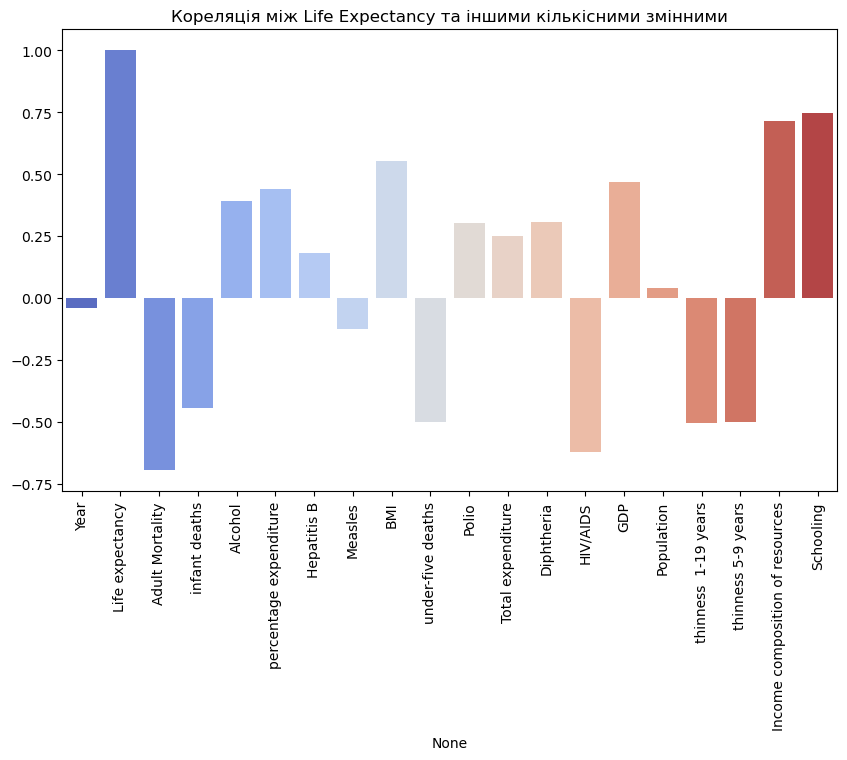

In [10]:
# Обчислюємо кореляційну матрицю тільки для кількісних змінних
correlation_matrix = df.select_dtypes(include=[np.number]).corr()

# Залишаємо тільки кореляцію з 'Life expectancy'
life_expectancy_corr = correlation_matrix['Life expectancy']

# Виводимо результат
print(life_expectancy_corr)

# Візуалізація кореляції між Life Expectancy та іншими змінними
plt.figure(figsize=(10, 6))
sns.barplot(x=life_expectancy_corr.index, y=life_expectancy_corr.values, palette='coolwarm')
plt.title('Кореляція між Life Expectancy та іншими кількісними змінними')
plt.xticks(rotation=90)
plt.show()


In [11]:
#Висновки:
#Сильні позитивні кореляції:

#Schooling (0.747): Чим вищий рівень освіти, тим більше очікувана тривалість життя.
#Освіта має суттєвий вплив на якість життя та доступ до медичних послуг.
#Income composition of resources (0.715): Вищий рівень доходів і добробуту асоціюється з довшою тривалістю життя. 
#Це підтверджує важливість соціально-економічних чинників.
#BMI (0.554): Оптимальний індекс маси тіла сприяє збільшенню тривалості життя.
#Середні позитивні кореляції:

#GDP (0.470): Вищий ВВП позитивно впливає на тривалість життя через доступ до якісного медичного обслуговування та харчування.
#percentage expenditure (0.439): Частка витрат на охорону здоров’я в загальному бюджеті позитивно корелює з тривалістю життя.
#Alcohol (0.392): Незначний позитивний зв'язок може свідчити про помірне споживання алкоголю в країнах із вищим рівнем життя.
#Негативні кореляції:

#Adult Mortality (-0.697): Високий рівень смертності серед дорослих значно скорочує очікувану тривалість життя.
#HIV/AIDS (-0.624): Рівень інфекційних захворювань має сильний негативний вплив.
#thinness (1-19 років, -0.504): Недоїдання серед дітей і підлітків скорочує тривалість життя.
#under-five deaths (-0.501): Висока дитяча смертність негативно впливає на загальний рівень тривалості життя.
#infant deaths (-0.444): Підтверджує значущість охорони материнства і раннього віку.
#Слабкі або відсутні зв’язки:

#Year (-0.040): Часові зміни не мають значного зв’язку з тривалістю життя, що вказує на стабільність інших важливих чинників.
#Population (0.041): Загальна чисельність населення майже не впливає на середню тривалість життя.

In [12]:
X = df.drop(['Life expectancy'], axis=1)
y = df['Life expectancy']


In [13]:
# Вибираємо категоріальні стовпці в матриці незалежних змінних
categorical_columns = X.select_dtypes(include=['object']).columns

# Вибираємо кількісні ознаки (числові стовпці) в матриці незалежних змінних
numeric_columns = X.select_dtypes(include=[float, int]).columns


In [14]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
# Імпортуємо клас StandardScaler з sklearn, який використовується для стандартизації даних
scaler = StandardScaler()

# Стандартизуємо кількісні ознаки
standardized_columns = scaler.fit_transform(X[numeric_columns])

# Перетворюємо стандартизовані дані в DataFrame з відповідними назвами стовпців
standardized_X = pd.DataFrame(standardized_columns, columns=numeric_columns, index=X.index)

# Видаляємо початкові кількісні ознаки
X = X.drop(columns=numeric_columns)

# Додаємо стандартизовані ознаки назад до DataFrame
X = pd.concat([X, standardized_X], axis=1)

# Перевіряємо результат
print(X.head())

        Country      Status      Year  Adult Mortality  infant deaths  \
1   Afghanistan  Developing  1.495143         1.050610       1.888229   
2   Afghanistan  Developing  1.250182         1.022055       1.964195   
3   Afghanistan  Developing  1.005220         1.060129       2.078145   
14  Afghanistan  Developing -1.689356         1.478938       2.799824   
15  Afghanistan  Developing -1.934317         1.526530       2.799824   

     Alcohol  percentage expenditure  Hepatitis B   Measles       BMI  ...  \
1  -1.175557               -0.434428    -0.824174 -0.147222 -1.110841  ...   
2  -1.175557               -0.434726    -0.739941 -0.165038 -1.137490  ...   
3  -1.175557               -0.429860    -0.613592  0.512237 -1.164138  ...   
14 -1.175557               -0.496123    -0.782058  2.229131 -1.430626  ...   
15 -1.175557               -0.496270    -0.824174  1.588349 -1.451945  ...   

       Polio  Total expenditure  Diphtheria  HIV/AIDS       GDP  Population  \
1  -1.231318 

In [15]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
# Імпортуємо клас OneHotEncoder з бібліотеки sklearn
encoder = OneHotEncoder(sparse_output=False, drop='first')

# Застосовуємо OneHotEncoder до категоріальних стовпців
encoded_columns = encoder.fit_transform(X[categorical_columns])

# Створюємо новий DataFrame з перекодованими змінними і назвами колонок
encoded_X = pd.DataFrame(encoded_columns, columns=encoder.get_feature_names_out(categorical_columns), index=X.index)

# Об'єднуємо початковий DataFrame з новими перекодованими стовпцями
X = X.drop(columns=categorical_columns)  # Видаляємо оригінальні категоріальні стовпці
X = pd.concat([X, encoded_X], axis=1)

# Перевіряємо результати
print(X.head())


        Year  Adult Mortality  infant deaths   Alcohol  \
1   1.495143         1.050610       1.888229 -1.175557   
2   1.250182         1.022055       1.964195 -1.175557   
3   1.005220         1.060129       2.078145 -1.175557   
14 -1.689356         1.478938       2.799824 -1.175557   
15 -1.934317         1.526530       2.799824 -1.175557   

    percentage expenditure  Hepatitis B   Measles       BMI  \
1                -0.434428    -0.824174 -0.147222 -1.110841   
2                -0.434726    -0.739941 -0.165038 -1.137490   
3                -0.429860    -0.613592  0.512237 -1.164138   
14               -0.496123    -0.782058  2.229131 -1.430626   
15               -0.496270    -0.824174  1.588349 -1.451945   

    under-five deaths     Polio  ...  Country_Turkey  Country_Turkmenistan  \
1            1.827888 -1.231318  ...             0.0                   0.0   
2            1.910366 -1.046754  ...             0.0                   0.0   
3            2.020337 -0.816050  ...  

In [16]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1255 entries, 1 to 1638
Columns: 143 entries, Year to Status_Developing
dtypes: float64(143)
memory usage: 1.4 MB


In [17]:
# Стандартизуємо цільову змінну, попередньо перетворивши її в масив NumPy
y_array = y.to_numpy().reshape(-1, 1)

# Стандартизуємо за допомогою StandardScaler
target_scaler = StandardScaler()
y_scaled = target_scaler.fit_transform(y_array)

In [18]:
# Розбиваємо дані на навчальну і тестову вибірки
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_scaled, test_size=0.1, random_state=42)

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR  # Додаємо SVR (Support Vector Regression)
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Список моделей регресії, які будемо навчати
regression_models = [
    LinearRegression(),
    DecisionTreeRegressor(random_state=42),
    RandomForestRegressor(n_estimators=100, random_state=42),
    KNeighborsRegressor(),
    SVR(kernel='linear')  # Додаємо SVR з лінійним ядром
]

# Списки для збереження R² на тренувальній та тестовій вибірках
training_scores = []
testing_scores = []

# Функція для навчання та оцінки моделі
def model_prediction(model, x_train, y_train, x_test, y_test):
    model.fit(x_train, y_train)  # Навчання моделі на тренувальній вибірці
    x_train_pred = model.predict(x_train)  # Прогноз на тренувальній вибірці
    x_test_pred = model.predict(x_test)    # Прогноз на тестовій вибірці
    
    # Обчислюємо R² на тренувальній та тестовій вибірках
    a = r2_score(y_train, x_train_pred) * 100
    b = r2_score(y_test, x_test_pred) * 100
    
    training_scores.append(a)
    testing_scores.append(b)
    
    print(f"R² для {type(model).__name__} на навчальній вибірці: {a:.2f}")
    print(f"R² для {type(model).__name__} на тестовій вибірці: {b:.2f}")

# Оцінка моделей
for model in regression_models:
    print(f"Оцінка {type(model).__name__} моделі:")
    model_prediction(model, X_train, y_train, X_test, y_test)
    print("\n")

# Вибір найкращої моделі
best_model_index = testing_scores.index(max(testing_scores))
best_model = regression_models[best_model_index]
best_test_score = testing_scores[best_model_index]

print(f"Найкраща модель: {type(best_model).__name__} з R² {best_test_score:.2f} на тестовій вибірці.")


Оцінка LinearRegression моделі:
R² для LinearRegression на навчальній вибірці: 97.06
R² для LinearRegression на тестовій вибірці: 92.99


Оцінка DecisionTreeRegressor моделі:
R² для DecisionTreeRegressor на навчальній вибірці: 100.00
R² для DecisionTreeRegressor на тестовій вибірці: 91.95


Оцінка RandomForestRegressor моделі:
R² для RandomForestRegressor на навчальній вибірці: 99.35
R² для RandomForestRegressor на тестовій вибірці: 92.89


Оцінка KNeighborsRegressor моделі:
R² для KNeighborsRegressor на навчальній вибірці: 93.95
R² для KNeighborsRegressor на тестовій вибірці: 87.26


Оцінка SVR моделі:
R² для SVR на навчальній вибірці: 96.35
R² для SVR на тестовій вибірці: 92.17


Найкраща модель: LinearRegression з R² 92.99 на тестовій вибірці.


In [20]:
#Опис Обраних Моделей:
#Linear Regression
#Модель лінійної регресії припускає лінійну залежність між ознаками та цільовою змінною. Вона використовує рівняння прямої, щоб передбачити значення.
#Decision Tree Regressor
#Вона працює добре з нелінійними залежностями та зможе вловлювати складні взаємозв'язки між ознаками.
#Random Forest Regressor
#Кінцевий прогноз отримується як середнє значення прогнозів окремих дерев.
#K-Nearest Neighbors (KNN) Regressor
#Враховує просторову близькість даних, що робить його ефективним для нелінійних залежностей.
#Support Vector Regressor (SVR)
#Вона особливо ефективна для задач з невеликою кількістю ознак або при складних взаємозв'язках.

In [21]:
#Linear Regression

#R² на навчальній вибірці: 97.06%
#R² на тестовій вибірці: 92.99%
#Лінійна регресія показала високу точність як на навчальній, так і на тестовій вибірках, з мінімальною різницею між значеннями R², що вказує на хорошу узагальнюючу здатність моделі.
#Decision Tree Regressor

#R² на навчальній вибірці: 100.00%
#R² на тестовій вибірці: 91.95%
#Модель повністю підлаштувалася під навчальні дані, що свідчить про перенавчання, оскільки R² на тестовій вибірці значно нижче.
#Random Forest Regressor

#R² на навчальній вибірці: 99.35%
#R² на тестовій вибірці: 92.89%
#Random Forest показала стабільно високу точність, близьку до лінійної регресії, і зменшила перенавчання у порівнянні з одним деревом.
#KNeighbors Regressor

#R² на навчальній вибірці: 93.95%
#R² на тестовій вибірці: 87.26%
#Модель KNN мала найнижчу точність, і її продуктивність зменшилася на тестовій вибірці, що вказує на проблеми з узагальненням.
#SVR

#R² на навчальній вибірці: 96.35%
#R² на тестовій вибірці: 92.17%
#SVR показав хорошу продуктивність, але з невеликою втратою точності в порівнянні з лінійною регресією.
#Linear Regression була обрана найкращою моделлю через високу продуктивність (R² = 92.99%) на тестовій вибірці, що вказує на здатність добре узагальнювати дані.
#Переваги лінійної регресії:
#Простота та легка інтерпретація.
#Хороші результати на даних з лінійними взаємозв'язками.
#Мала різниця між навчальною та тестовою точністю, що свідчить про відсутність перенавчання.


In [22]:
#Налаштувати параметри лінійної регресії 

In [23]:
 #Зміна параметра fit_intercept

In [24]:
model_no_intercept = LinearRegression(fit_intercept=False)
model_no_intercept.fit(X_train, y_train)
y_pred_no_intercept = model_no_intercept.predict(X_test)

r2_no_intercept = r2_score(y_test, y_pred_no_intercept)
print(f"R² без перехоплення: {r2_no_intercept:.3f}")


R² без перехоплення: 0.930


In [25]:
#Трохи допомогла  0.929 було 0.930 стало

In [26]:
from sklearn.linear_model import Ridge

# Налаштування моделі Ridge з параметром alpha
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)

r2_ridge = r2_score(y_test, y_pred_ridge)
print(f"R² для Ridge: {r2_ridge:.3f}")


R² для Ridge: 0.915


In [27]:
from sklearn.linear_model import Lasso

# Налаштування моделі Lasso з параметром alpha
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train, y_train)
y_pred_lasso = lasso_model.predict(X_test)

r2_lasso = r2_score(y_test, y_pred_lasso)
print(f"R² для Lasso: {r2_lasso:.3f}")


R² для Lasso: 0.780


In [28]:
#Не допомогли 

In [29]:
#Я спробував налаштувати його параметри для покращення якості ...

In [30]:
#Опис використаних підходів до обробки та аналізу даних.
#Я почав з огляду даних за допомогою df.head(), df.info(), df.dtypes, df.describe() та перевірки на пропущені значення через
#df.isnull().sum(). Потім очистив числові стовпці від викидів, використовуючи квантилі 1% та 99%. Видалив значення,
#що виходять за цей діапазон, але зберіг пропуски (NaN). Після очищення перевірив кількість рядків і знову переглянув структуру DataFrame.
#Також видалив зайві пробіли в назвах стовпців за допомогою df.columns.str.strip().

In [31]:
#Результати кореляційного аналізу та виявлені залежності.
#Сильні позитивні кореляції:

#Schooling (0.747): Чим вищий рівень освіти, тим більше очікувана тривалість життя.
#Освіта має суттєвий вплив на якість життя та доступ до медичних послуг.
#Income composition of resources (0.715): Вищий рівень доходів і добробуту асоціюється з довшою тривалістю життя. 
#Це підтверджує важливість соціально-економічних чинників.
#BMI (0.554): Оптимальний індекс маси тіла сприяє збільшенню тривалості життя.
#Середні позитивні кореляції:

#GDP (0.470): Вищий ВВП позитивно впливає на тривалість життя через доступ до якісного медичного обслуговування та харчування.
#percentage expenditure (0.439): Частка витрат на охорону здоров’я в загальному бюджеті позитивно корелює з тривалістю життя.
#Alcohol (0.392): Незначний позитивний зв'язок може свідчити про помірне споживання алкоголю в країнах із вищим рівнем життя.
#Негативні кореляції:

#Adult Mortality (-0.697): Високий рівень смертності серед дорослих значно скорочує очікувану тривалість життя.
#HIV/AIDS (-0.624): Рівень інфекційних захворювань має сильний негативний вплив.
#thinness (1-19 років, -0.504): Недоїдання серед дітей і підлітків скорочує тривалість життя.
#under-five deaths (-0.501): Висока дитяча смертність негативно впливає на загальний рівень тривалості життя.
#infant deaths (-0.444): Підтверджує значущість охорони материнства і раннього віку.
#Слабкі або відсутні зв’язки:

#Year (-0.040): Часові зміни не мають значного зв’язку з тривалістю життя, що вказує на стабільність інших важливих чинників.
#Population (0.041): Загальна чисельність населення майже не впливає на середню тривалість життя.

In [32]:
#Результати кореляційного аналізу та виявлені залежності.
#Опис Обраних Моделей:
#Linear Regression
#Модель лінійної регресії припускає лінійну залежність між ознаками та цільовою змінною. Вона використовує рівняння прямої, щоб передбачити значення.
#Decision Tree Regressor
#Вона працює добре з нелінійними залежностями та зможе вловлювати складні взаємозв'язки між ознаками.
#Random Forest Regressor
#Кінцевий прогноз отримується як середнє значення прогнозів окремих дерев.
#K-Nearest Neighbors (KNN) Regressor
#Враховує просторову близькість даних, що робить його ефективним для нелінійних залежностей.
#Support Vector Regressor (SVR)
#Вона особливо ефективна для задач з невеликою кількістю ознак або при складних взаємозв'язках.
#Linear Regression

#R² на навчальній вибірці: 97.06%
#R² на тестовій вибірці: 92.99%
#Лінійна регресія показала високу точність як на навчальній, так і на тестовій вибірках, з мінімальною різницею між значеннями R², що вказує на хорошу узагальнюючу здатність моделі.
#Decision Tree Regressor

#R² на навчальній вибірці: 100.00%
#R² на тестовій вибірці: 91.95%
#Модель повністю підлаштувалася під навчальні дані, що свідчить про перенавчання, оскільки R² на тестовій вибірці значно нижче.
#Random Forest Regressor

#R² на навчальній вибірці: 99.35%
#R² на тестовій вибірці: 92.89%
#Random Forest показала стабільно високу точність, близьку до лінійної регресії, і зменшила перенавчання у порівнянні з одним деревом.
#KNeighbors Regressor

#R² на навчальній вибірці: 93.95%
#R² на тестовій вибірці: 87.26%
#Модель KNN мала найнижчу точність, і її продуктивність зменшилася на тестовій вибірці, що вказує на проблеми з узагальненням.
#SVR

#R² на навчальній вибірці: 96.35%
#R² на тестовій вибірці: 92.17%
#SVR показав хорошу продуктивність, але з невеликою втратою точності в порівнянні з лінійною регресією.
#Linear Regression була обрана найкращою моделлю через високу продуктивність (R² = 92.99%) на тестовій вибірці, що вказує на здатність добре узагальнювати дані.
#Переваги лінійної регресії:
#Простота та легка інтерпретація.
#Хороші результати на даних з лінійними взаємозв'язками.
#Мала різниця між навчальною та тестовою точністю, що свідчить про відсутність перенавчання.
